<a href="https://colab.research.google.com/github/Francisss3/AAI614_Francis-/blob/main/Notebook6_1_K_means_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 6.1: Classification vs Clustering*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%206/Notebook6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: This notebook contains excerpts from *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron*

Define the default font sizes to make the figures prettier:

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Classification vs Clustering

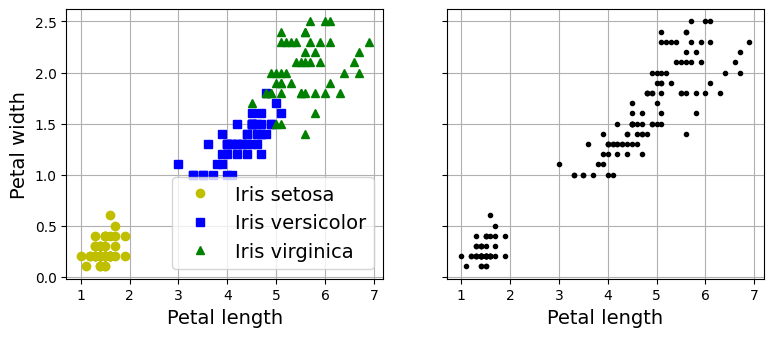

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

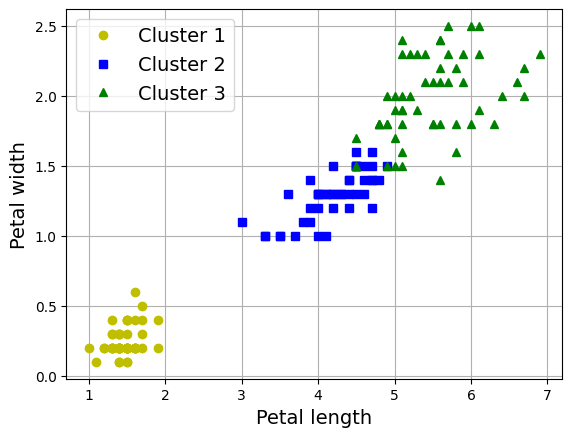

In [3]:
import numpy as np
from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()
plt.show()

What's the ratio of iris plants we assigned to the right cluster?

In [4]:
(y_pred==y).sum() / len(y_pred)

0.9666666666666667

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Define default font sizes for prettier figures
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [6]:
data = load_iris()
X = data.data
y = data.target

#Scale data for potentially better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
def map_clusters_to_labels(y_true, y_pred):
    mapping = {}
    for class_id in np.unique(y_true):
        # Use keepdims=True to ensure the result is an array
        result = stats.mode(y_pred[y_true == class_id], keepdims=True)
        mode_value = result.mode[0]
        mapping[mode_value] = class_id

    mapped_labels = np.array([mapping.get(cluster_id, -1) for cluster_id in y_pred])
    return mapped_labels


Default K-means accuracy: 0.5533333333333333


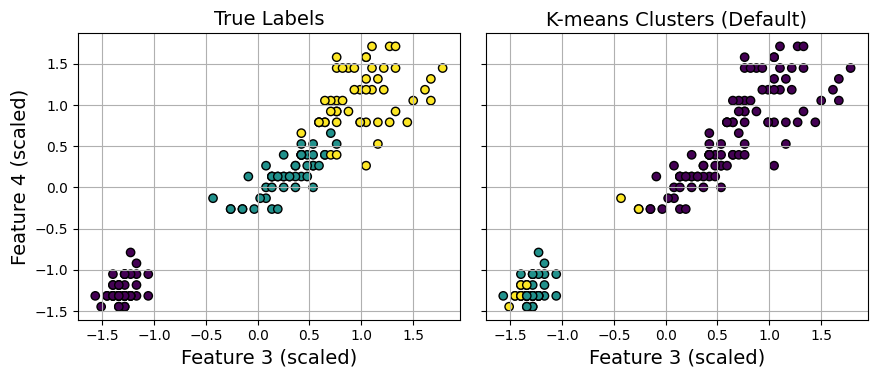

In [12]:
kmeans_default = KMeans(n_clusters=3, random_state=42)
y_pred_default = kmeans_default.fit_predict(X_scaled)

y_pred_mapped_default = map_clusters_to_labels(y, y_pred_default)
accuracy_default = (y_pred_mapped_default == y).sum() / len(y)
print("Default K-means accuracy:", accuracy_default)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.title("True Labels")
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 3 (scaled)")
plt.ylabel("Feature 4 (scaled)")
plt.grid()

plt.subplot(122)
plt.title("K-means Clusters (Default)")
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred_default, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 3 (scaled)")
plt.tick_params(labelleft=False)
plt.grid()

plt.tight_layout()
plt.show()


In [13]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)
    y_pred_mapped = map_clusters_to_labels(y, y_pred)
    accuracy = (y_pred_mapped == y).sum() / len(y)
    print(f"K-means with k={k} accuracy:", accuracy)


K-means with k=2 accuracy: 0.6666666666666666
K-means with k=3 accuracy: 0.5533333333333333
K-means with k=4 accuracy: 0.7
K-means with k=5 accuracy: 0.58


In [14]:
for init_method in ["k-means++", "random"]:
    kmeans_init = KMeans(n_clusters=3, init=init_method, n_init=10, random_state=42)
    y_pred_init = kmeans_init.fit_predict(X_scaled)
    y_pred_mapped_init = map_clusters_to_labels(y, y_pred_init)
    accuracy_init = (y_pred_mapped_init == y).sum() / len(y)
    print(f"K-means with init={init_method} accuracy:", accuracy_init)


K-means with init=k-means++ accuracy: 0.8333333333333334
K-means with init=random accuracy: 0.8266666666666667


In [15]:
for max_iter in [100, 300, 500, 1000]:
    kmeans_iter = KMeans(n_clusters=3, max_iter=max_iter, random_state=42)
    y_pred_iter = kmeans_iter.fit_predict(X_scaled)
    y_pred_mapped_iter = map_clusters_to_labels(y, y_pred_iter)
    accuracy_iter = (y_pred_mapped_iter == y).sum() / len(y)
    print(f"K-means with max_iter={max_iter} accuracy:", accuracy_iter)


K-means with max_iter=100 accuracy: 0.5533333333333333
K-means with max_iter=300 accuracy: 0.5533333333333333
K-means with max_iter=500 accuracy: 0.5533333333333333
K-means with max_iter=1000 accuracy: 0.5533333333333333


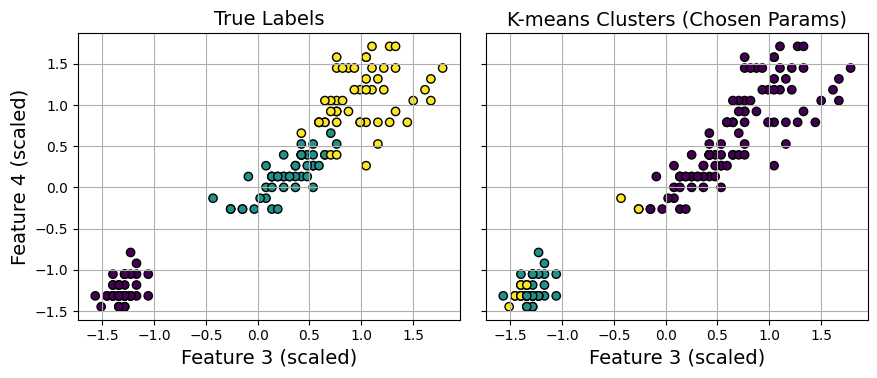

Final chosen model accuracy: 0.5533333333333333


In [16]:
# Using default chosen above
y_pred_chosen = y_pred_default
plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.title("True Labels")
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 3 (scaled)")
plt.ylabel("Feature 4 (scaled)")
plt.grid()

plt.subplot(122)
plt.title("K-means Clusters (Chosen Params)")
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred_chosen, cmap='viridis', edgecolor='k')
plt.xlabel("Feature 3 (scaled)")
plt.tick_params(labelleft=False)
plt.grid()

plt.tight_layout()
plt.show()

print("Final chosen model accuracy:", accuracy_default)
